Import and Install libraries

In [1]:
!pip install keras matplotlib tensorflow

In [2]:
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.utils import to_categorical
from keras.optimizers import Adam
import matplotlib.pyplot as plt


Normalize

In [3]:
(x_train , y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

To_categorical

In [4]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

Model Creation

In [5]:
model_3 = Sequential()
model_3.add(Flatten(input_shape=(32, 32, 3))) #3 is for RGB channels
model_3.add(Dense(1024, activation='relu'))
model_3.add(Dense(512, activation='relu'))
model_3.add(Dense(256, activation='relu'))
model_3.add(Dense(10, activation='softmax'))


d:\Engineering\PROJECTS\AI Bootcamp\.venv\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Run Model and Compile

In [6]:
model_3.compile(optimizer=Adam(learning_rate=0.01), loss='categorical_crossentropy', metrics=['accuracy'])
result = model_3.fit(x_train, y_train, epochs=10, batch_size=64, validation_split=0.2)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 20s 30ms/step - accuracy: 0.2477 - loss: 2.6088 - val_accuracy: 0.2919 - val_loss: 1.8975
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 18s 29ms/step - accuracy: 0.2988 - loss: 1.8924 - val_accuracy: 0.2641 - val_loss: 1.9767
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 19s 30ms/step - accuracy: 0.3205 - loss: 1.8470 - val_accuracy: 0.3369 - val_loss: 1.8354
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 19s 31ms/step - accuracy: 0.3169 - loss: 1.8469 - val_accuracy: 0.3088 - val_loss: 1.8926
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 23s 37ms/step - accuracy: 0.3283 - loss: 1.8320 - val_accuracy: 0.2791 - val_loss: 1.9610
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.3257 - loss: 1.8310 - val_accuracy: 0.3229 - val_loss: 1.8278
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 21s 33ms/step - accuracy: 0.3262 - loss: 1.8272 - val_accuracy: 0.3214 - val_loss: 1.8371
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 20s 31ms/step - accuracy: 0.3316 - loss: 1.8175 - 

Test and Prediction

In [7]:
(loss , accuracy) = model_3.evaluate(x_test, y_test)
print(f"Test Loss: {loss:.02f}")
print(f"Test Accuracy: {accuracy*100:.02f}%")
print(result.history)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.2954 - loss: 1.8590
Test Loss: 1.86
Test Accuracy: 29.54%
{'accuracy': [0.24770000576972961, 0.29884999990463257, 0.3204750120639801, 0.3169249892234802, 0.32827499508857727, 0.32567501068115234, 0.32615000009536743, 0.33160001039505005, 0.33082500100135803, 0.3041999936103821], 'loss': [2.6088411808013916, 1.892364263534546, 1.8470290899276733, 1.8469479084014893, 1.831997275352478, 1.8310130834579468, 1.8272114992141724, 1.817533254623413, 1.8185166120529175, 1.8566665649414062], 'val_accuracy': [0.29190000891685486, 0.26409998536109924, 0.336899995803833, 0.30880001187324524, 0.2791000008583069, 0.3228999972343445, 0.321399986743927, 0.3285999894142151, 0.32440000772476196, 0.30070000886917114], 'val_loss': [1.8974710702896118, 1.9767436981201172, 1.8354310989379883, 1.8926056623458862, 1.9610058069229126, 1.8278120756149292, 1.8370652198791504, 1.823400616645813, 1.8401705026626587, 1.8738230466842651]}


PLOT

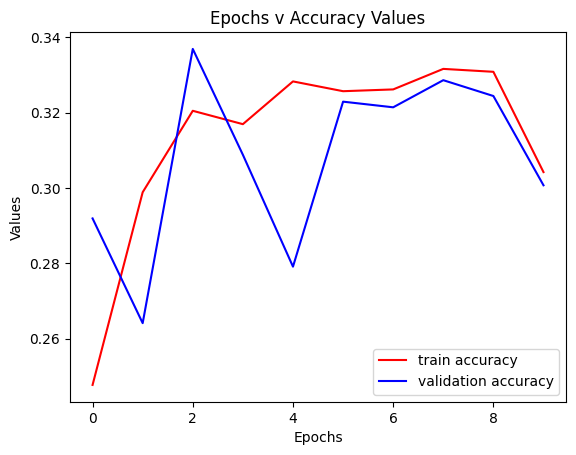

In [8]:
plt.plot(result.history['accuracy'], label='train accuracy', color='red')
plt.plot(result.history['val_accuracy'], label='validation accuracy', color='blue')
plt.title('Epochs v Accuracy Values')
plt.xlabel('Epochs')
plt.ylabel('Values')
plt.legend()
plt.show()

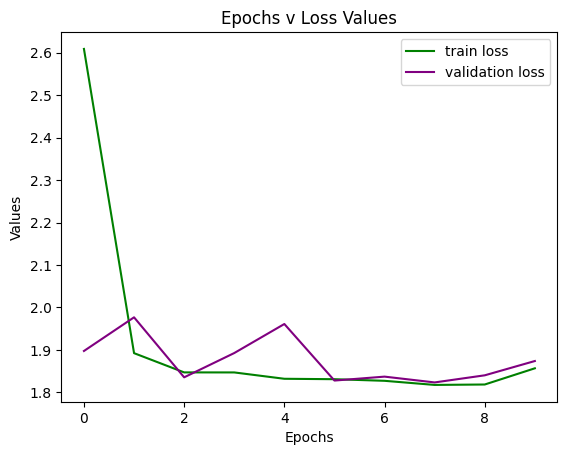

In [9]:
plt.plot(result.history['loss'], label='train loss', color='green')
plt.plot(result.history['val_loss'], label='validation loss', color='purple')
plt.title('Epochs v Loss Values')
plt.xlabel('Epochs')
plt.ylabel('Values')
plt.legend()
plt.show()